# News Title Classification

## Step1: Datasets Preprocessing

In [ ]:
import json
import os

with open('News.json', 'r') as fp:
    datasets = json.load(fp)

category =[]
groups = {}

for data in datasets:
    item = data['category']
    if not item in category:
        category.append(item)

    if data.get('category') is not None:
        groups.setdefault(data["category"], []).append(data)

print(category)
# category = ['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS', 'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES', 'SPORTS', 'BUSINESS']
obj_zip = zip(category, [0] * len(category) )
count = dict(obj_zip)

for key in groups: 
#    print(key, groups[key])
    value = groups[key]
    os.makedirs('data/' + key)
    for i in range(len(value)):
        file = open('data/' + key + '/' + str(i) + '.txt', 'w+')
        file.write(str(value[i]))
        file.close()

In [8]:
import glob

category = ['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS', 'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES', 'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION', 'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS']
directory_list = ["data/CRIME/*.txt", "data/ENTERTAINMENT/*.txt","data/WORLD NEWS/*.txt","data/IMPACT/*.txt","data/POLITICS/*.txt","data2/WEIRD NEWS/*.txt","data2/BLACK VOICES/*.txt", "data/WOMEN/*.txt", "data/COMEDY/*.txt", "data/QUEER VOICES/*.txt", "data/SPORTS/*.txt", "data/BUSINESS/*.txt", "data/TRAVEL/*.txt", "data/MEDIA/*.txt", "data/TECH/*.txt", "data/RELIGION/*.txt", "data/SCIENCE/*.txt", "data/LATINO VOICES/*.txt", "data/EDUCATION/*.txt", "data/COLLEGE/*.txt", "data/PARENTS/*.txt", "data/ARTS & CULTURE/*.txt", "data/STYLE/*.txt", "data/GREEN/*.txt", "data/TASTE/*.txt", "data/HEALTHY LIVING/*.txt", "data/THE WORLDPOST/*.txt", "data/GOOD NEWS/*.txt"]

text_files = list(map(lambda x: glob.glob(x), directory_list))
text_files = [item for sublist in text_files for item in sublist]

training_data = []

for file in text_files:
    f = open(file, 'r')
    f = f.read()
    content = eval(f)
    training_data.append({'data':content['headline'] + ' ' + content['short_description'], 'flag': category.index(content['category'])})

training_data[0]

{'data': 'Las Vegas Gunman Had \'Cache Of Weapons\' The gunfire "just kept coming," a witness said. "It was relentless."',
 'flag': 0}

In [9]:
import pandas as pd

training_data = pd.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')
print(training_data.head())
print(training_data.data.shape)

                                                data  flag
0  Las Vegas Gunman Had 'Cache Of Weapons' The gu...     0
1  Police Say 3 Deaths Could Be Work Of Serial Ki...     0
2  Manhattan DA Swept Harvey Weinstein Sexual Har...     0
3  1 Person Found Dead After Explosion Rocks Site...     0
4  7 Killed In What May Be Australia's Worst Mass...     0
(24219,)


## Step 2: Count the types of each word

In [10]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)

#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

## Step 3: Count the frequency of words

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# print(X_train_tfidf)

#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

## Step 4: Use different algorithms to predict

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)

### Model 1: Multinomial Naive Bayes

In [13]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb= MultinomialNB()
clf = nb.fit(X_train, y_train)

#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [14]:
#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

In [15]:
NB_predicted = loaded_model.predict(X_test)
result_bayes = pd.DataFrame( {'true_labels': y_test,'predicted_labels': NB_predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

for predicted_item, result in zip(NB_predicted, y_test):
    print(category[predicted_item], ' - ', category[result])

POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  SCIENCE
ENTERTAINMENT  -  QUEER VOICES
POLITICS  -  EDUCATION
ENTERTAINMENT  -  COMEDY
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  GREEN
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  PARENTS
ENTERTAINMENT  -  PARENTS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
ENTERTAINMENT  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  CRIME
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  PARENTS
POLITICS  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  GREEN
POLITICS  -  IMPACT
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POL

POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  IMPACT
POLITICS  -  ENTERTAINMENT
ENTERTAINMENT  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  QUEER VOICES
POLITICS  -  WORLD NEWS
POLITICS  -  WORLD NEWS
POLITICS  -  ENTERTAINMENT
POLITICS  -  GREEN
POLITICS  -  WOMEN
POLITICS  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  QUEER VOICES
POLITICS  -  PARENTS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  HEALTHY LIVING
POLITICS  -  TRAVEL
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTER

POLITICS  -  ENTERTAINMENT
POLITICS  -  GREEN
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  MEDIA
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  LATINO VOICES
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  COMEDY
POLITICS  -  RELIGION
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  MEDIA
POLITICS  -  WORLD NEWS
POLITICS  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  WORLD NEWS
POLITICS  -  COMEDY
POLITICS  -  ENTERTAINMENT
POLITICS  -  WOMEN
WORLD NEWS  -  WORLD NEWS
POLITICS  -  WORLD NEWS
ENTERTAINMENT  -  QUEER VOICES
POLITICS  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  TASTE
POLITICS  -  WORLD NEWS
POLITICS  -  QUEER VOICES
POLITICS  -  BUSINESS
POLITICS  -  POLITICS
POLITICS 

POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  COMEDY
POLITICS  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  HEALTHY LIVING
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  WORLD NEWS
POLITICS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  TECH
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  HEALTHY LIVING
POLITICS  -  STYLE
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  PARENTS
POLITICS  -  CRIME
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  EDUCATION
ENTERTAINMENT  -  PARENTS
POLITICS  -  MEDIA
POLITICS  -  MEDIA
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  LATINO VOICES
POLITICS  -  WORLD NEWS
POLITICS  -  QUEER VOICES
POLITICS  -  MEDIA
POLITICS  -  BUSINESS
POLITICS  -  

POLITICS  -  ENTERTAINMENT
POLITICS  -  IMPACT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  WORLD NEWS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  WORLD NEWS
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WOMEN
POLITICS  -  ENTERTAINMENT
POLITICS  -  SCIENCE
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  GREEN
ENTERTAINMENT  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  BUSINESS
POLITICS  -  QUEER VOICES
POLITICS  -  WORLD NEWS
POLITICS  -  QUEER VOICES
POLITICS  -  WOMEN
POLITICS  -  BUSINESS
POLITICS  -  SPORTS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  

POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  MEDIA
POLITICS  -  WOMEN
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  COMEDY
POLITICS  -  SPORTS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  STYLE
POLITICS  -  WOMEN
POLITICS  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  COMEDY
POLITICS  -  CRIME
POLITICS  -  ENTERTAINMENT
POLITICS  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  WOMEN
POLITICS  -  MEDIA
POLITICS  -  POLITICS
POLITICS  -  HEALTHY LIVING
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  

POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  TASTE
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  COMEDY
POLITICS  -  CRIME
POLITICS  -  PARENTS
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  LATINO VOICES
POLITICS  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  SPORTS
POLITICS  -  MEDIA
POLITICS  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  QUEER VOICES
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  MEDIA
POLITICS  -  POLITICS
POLITICS  -  TRAVEL
POLITICS  -  POLITICS
POLITICS  -  WOMEN
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  TECH
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  WOMEN
POLITICS  -  MEDIA
POLITICS  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  COMEDY
POLITICS  -  POLITICS
POLITICS

POLITICS  -  HEALTHY LIVING
ENTERTAINMENT  -  QUEER VOICES
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  WOMEN
POLITICS  -  WORLD NEWS
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  QUEER VOICES
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  CRIME
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  QUEER VOICES
POLITICS  -  COMEDY
POLITICS  -  GREEN
POLITICS  -  IMPACT
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  RELIGION
POLITICS  -  WORLD NEWS
POLITICS  -  WORLD NEWS
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  COMEDY
POLITICS  -  CRIME
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTER

POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  PARENTS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  SPORTS
POLITICS  -  TECH
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  STYLE
POLITICS  -  GREEN
POLITICS  -  COMEDY
POLITICS  -  CRIME
POLITICS  -  ENTERTAINMENT
POLITICS  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  TASTE
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  QUEER VOICES
POLITICS  -  WORLD NEWS
POLITICS  -  QUEER VOICES
POLITICS  -  MEDIA
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  GREEN
POLITICS  -  STYLE
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  BUSINESS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  SPORTS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT

POLITICS  -  IMPACT
POLITICS  -  ENTERTAINMENT
POLITICS  -  MEDIA
POLITICS  -  POLITICS
POLITICS  -  WOMEN
POLITICS  -  PARENTS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WOMEN
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
ENTERTAINMENT  -  QUEER VOICES
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  SPORTS
POLITICS  -  COMEDY
POLITICS  -  WORLD NEWS
POLITICS  -  COMEDY
POLITICS  -  HEALTHY LIVING
ENTERTAINMENT  -  SPORTS
POLITICS  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  BUSINESS
POLITICS  -  TRAVEL
POLITICS  -  WORLD NEWS
POLITICS  -  PARENTS
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  

POLITICS  -  ENTERTAINMENT
POLITICS  -  WORLD NEWS
POLITICS  -  ENTERTAINMENT
POLITICS  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  QUEER VOICES
POLITICS  -  WORLD NEWS
POLITICS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  SPORTS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  LATINO VOICES
POLITICS  -  WORLD NEWS
POLITICS  -  HEALTHY LIVING
POLITICS  -  TASTE
POLITICS  -  ENTERTAINMENT
POLITICS  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  PARENTS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
POLITICS  -  GREEN
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  PARENTS
POLITICS  -  STYLE
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  WORLD NEWS
POLITICS  -  WORLD NEWS
POLITICS

In [16]:
#  accuracy
print("Multinomial Naive Bayes Accuracy: ",nb.score(X_test, y_test))

Multinomial Naive Bayes Accuracy:  0.43501238645747314


In [17]:
# from sklearn.metrics import confusion_matrix  
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [18]:
NB_f1_score = f1_score(y_test, NB_predicted, average='micro')
print(NB_f1_score)

NB_precision_score = precision_score(y_test, NB_predicted, average='micro')
print(NB_precision_score)

NB_recall_score = recall_score(y_test, NB_predicted, average='micro')
print(NB_recall_score)

# confusion_mat = confusion_matrix(y_test,predicted)
# print(confusion_mat)

0.43501238645747314
0.43501238645747314
0.43501238645747314


### Model 2: Neural Network with Software Layer

In [19]:
#Neural Network with Software Layer
from sklearn.neural_network import MLPClassifier

clf_neural = MLPClassifier(solver='lbfgs',max_iter=1000, alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

clf_neural.fit(X_train, y_train)

#SAVE MODEL
pickle.dump(clf_neural, open("softmax.pkl", "wb"))

In [20]:
#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("softmax.pkl","rb"))

In [21]:
NN_predicted = clf_neural.predict(X_test)
result_softmax = pd.DataFrame( {'true_labels': y_test,'predicted_labels': NN_predicted})
result_softmax.to_csv('res_softmax.csv', sep = ',')

for predicted_item, result in zip(NN_predicted, y_test):
    print(category[predicted_item], ' - ', category[result])

POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
IMPACT  -  WORLD NEWS
POLITICS  -  POLITICS
ENTERTAINMENT  -  QUEER VOICES
PARENTS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
SCIENCE  -  SCIENCE
WOMEN  -  QUEER VOICES
POLITICS  -  EDUCATION
ENTERTAINMENT  -  COMEDY
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
BUSINESS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  GREEN
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
STYLE  -  PARENTS
ENTERTAINMENT  -  PARENTS
POLITICS  -  POLITICS
QUEER VOICES  -  WORLD NEWS
POLITICS  -  POLITICS
ENTERTAINMENT  -  COMEDY
POLITICS  -  POLITICS
GREEN  -  POLITICS
POLITICS  -  POLITICS
TRAVEL  -  CRIME
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PARENTS
PARENTS  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
GREEN  -  GREEN
MEDIA  -  IMPACT
PARENTS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
RELIGION  -  POLITICS

POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  ARTS & CULTURE
POLITICS  -  MEDIA
GREEN  -  POLITICS
POLITICS  -  WORLD NEWS
PARENTS  -  PARENTS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
WOMEN  -  HEALTHY LIVING
COMEDY  -  ENTERTAINMENT
RELIGION  -  WOMEN
WORLD NEWS  -  POLITICS
LATINO VOICES  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
WOMEN  -  ARTS & CULTURE
STYLE  -  SPORTS
QUEER VOICES  -  QUEER VOICES
IMPACT  -  GREEN
ENTERTAINMENT  -  ENTERTAINMENT
TRAVEL  -  WORLD NEWS
STYLE  -  ENTERTAINMENT
PARENTS  -  PARENTS
QUEER VOICES  -  ENTERTAINMENT
EDUCATION  -  POLITICS
EDUCATION  -  TECH
ENTERTAINMENT  -  ENTERTAINMENT
TRAVEL  -  STYLE
COMEDY  -  WOMEN
GREEN  -  EDUCATION
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
MEDIA  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  WORLD NEWS
COMEDY  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
STYLE  -  ENTERTAINMENT
EDUCATION  -  BUSINESS
POLITICS  -  POLITICS


PARENTS  -  ENTERTAINMENT
STYLE  -  GREEN
POLITICS  -  POLITICS
COMEDY  -  COMEDY
EDUCATION  -  HEALTHY LIVING
POLITICS  -  GREEN
POLITICS  -  POLITICS
TASTE  -  TASTE
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  EDUCATION
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
RELIGION  -  RELIGION
POLITICS  -  POLITICS
WOMEN  -  TRAVEL
POLITICS  -  STYLE
SPORTS  -  SPORTS
COMEDY  -  POLITICS
IMPACT  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  WORLD NEWS
POLITICS  -  BUSINESS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  PARENTS
RELIGION  -  WOMEN
PARENTS  -  ENTERTAINMENT
BUSINESS  -  CRIME
COMEDY  -  COMEDY
POLITICS  -  POLITICS
MEDIA  -  MEDIA
POLITICS  -  POLITICS
LATINO VOICES  -  MEDIA
WOMEN  -  HEALTHY LIVING
COMEDY  -  COMEDY
WORLD NEWS  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
BUS

GREEN  -  GREEN
POLITICS  -  POLITICS
ENTERTAINMENT  -  QUEER VOICES
MEDIA  -  POLITICS
POLITICS  -  POLITICS
WOMEN  -  WOMEN
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
WOMEN  -  WOMEN
PARENTS  -  IMPACT
GREEN  -  POLITICS
HEALTHY LIVING  -  LATINO VOICES
POLITICS  -  POLITICS
POLITICS  -  BUSINESS
PARENTS  -  PARENTS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
EDUCATION  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
GOOD NEWS  -  PARENTS
COMEDY  -  TRAVEL
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
ARTS & CULTURE  -  POLITICS
QUEER VOICES  -  QUEER VOICES
WORLD NEWS  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  STYLE
LATINO VOICES  -  WOMEN
CRIME  -  ENTERTAINMENT
POLITICS  -  GREEN
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ARTS & CULTURE  -  SPORTS
POLITICS  -  COMEDY
RELIGION  -  WORLD NEWS
COMEDY  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLIT

HEALTHY LIVING  -  HEALTHY LIVING
ENTERTAINMENT  -  TASTE
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PARENTS
ENTERTAINMENT  -  QUEER VOICES
RELIGION  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  TASTE
QUEER VOICES  -  QUEER VOICES
IMPACT  -  HEALTHY LIVING
QUEER VOICES  -  QUEER VOICES
STYLE  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  WORLD NEWS
WOMEN  -  BUSINESS
POLITICS  -  POLITICS
IMPACT  -  GREEN
POLITICS  -  POLITICS
ENTERTAINMENT  -  MEDIA
POLITICS  -  POLITICS
TASTE  -  QUEER VOICES
POLITICS  -  POLITICS
ENTERTAINMENT  -  PARENTS
ENTERTAINMENT  -  ENTERTAINMENT
IMPACT  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
WORLD NEWS  -  ARTS & CULTURE
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WOMEN  -  WOMEN
WOMEN  -  RELIGION
POLITICS  -  WORLD NEWS
SCIENCE  -  MEDIA
POLITICS  -  POLITICS
LATINO VOICES  -  POLITICS
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS

POLITICS  -  POLITICS
POLITICS  -  POLITICS
HEALTHY LIVING  -  POLITICS
POLITICS  -  POLITICS
RELIGION  -  WORLD NEWS
POLITICS  -  POLITICS
RELIGION  -  POLITICS
RELIGION  -  POLITICS
QUEER VOICES  -  LATINO VOICES
POLITICS  -  POLITICS
IMPACT  -  WOMEN
SPORTS  -  SPORTS
POLITICS  -  POLITICS
WOMEN  -  LATINO VOICES
RELIGION  -  QUEER VOICES
CRIME  -  CRIME
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
LATINO VOICES  -  ENTERTAINMENT
MEDIA  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
WOMEN  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
LATINO VOICES  -  QUEER VOICES
POLITICS  -  COMEDY
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
COMEDY  -  ENTERTAINMENT
WORLD NEWS  -  WORLD NEWS
POLITICS  -  ENTERTAINMENT
SCIENCE  -  POLITICS
TASTE  -  TASTE
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
ENTERTAINMENT  -  STYLE
MEDIA  -  POLITICS
PARENTS  -  PARENTS
POLITICS  -  ENTERTAINMENT
QUEER VOICES

LATINO VOICES  -  SPORTS
COMEDY  -  MEDIA
POLITICS  -  POLITICS
BUSINESS  -  POLITICS
COMEDY  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
WORLD NEWS  -  ENTERTAINMENT
MEDIA  -  HEALTHY LIVING
POLITICS  -  POLITICS
CRIME  -  PARENTS
SPORTS  -  QUEER VOICES
COMEDY  -  COMEDY
POLITICS  -  POLITICS
BUSINESS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
STYLE  -  CRIME
GREEN  -  GREEN
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
HEALTHY LIVING  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ARTS & CULTURE  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
SPORTS  -  MEDIA
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
IMPACT  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
SPORTS  -  SPORTS
IMPACT  -  PARENTS
COMEDY  -  ENTERTAINMENT
HEALTHY LIVING  -  HEALTHY LIVING
IMPACT  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
ARTS & CULTURE  

EDUCATION  -  POLITICS
POLITICS  -  MEDIA
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  BUSINESS
POLITICS  -  BUSINESS
LATINO VOICES  -  WORLD NEWS
POLITICS  -  POLITICS
COMEDY  -  COMEDY
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
PARENTS  -  CRIME
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
BUSINESS  -  IMPACT
LATINO VOICES  -  WOMEN
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  LATINO VOICES
POLITICS  -  MEDIA
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
MEDIA  -  LATINO VOICES
RELIGION  -  POLITICS
HEALTHY LIVING  -  WORLD NEWS
HEALTHY LIVING  -  POLITICS
SPORTS  -  SPORTS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
STYLE  -  ENTERTAINMENT
WORLD NEWS  -  WORLD NEWS
LATINO VOICES  -  STYLE
BUSINESS  -  TRAVEL
EDUCATION  -  THE WORLDPOST
PARENTS  -  PARENTS
ENTERTAINMENT  -  ENTERTAINMENT
COMEDY  -  COMEDY
POLITICS  

POLITICS  -  POLITICS
POLITICS  -  POLITICS
HEALTHY LIVING  -  POLITICS
POLITICS  -  RELIGION
ENTERTAINMENT  -  ENTERTAINMENT
COMEDY  -  ENTERTAINMENT
PARENTS  -  HEALTHY LIVING
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
EDUCATION  -  POLITICS
WORLD NEWS  -  HEALTHY LIVING
TRAVEL  -  TRAVEL
PARENTS  -  PARENTS
POLITICS  -  POLITICS
WOMEN  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PARENTS
POLITICS  -  POLITICS
POLITICS  -  SCIENCE
WOMEN  -  WOMEN
WORLD NEWS  -  TRAVEL
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
IMPACT  -  WOMEN
POLITICS  -  RELIGION
WORLD NEWS  -  WORLD NEWS
EDUCATION  -  HEALTHY LIVING
IMPACT  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
RELIGION  -  POLITICS
WOMEN  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
IMPACT  -  WORLD NEWS
QUEER VOICES  -  POLITICS
POLITICS  -  POLITIC

POLITICS  -  POLITICS
ARTS & CULTURE  -  ARTS & CULTURE
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PARENTS
WOMEN  -  MEDIA
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
COMEDY  -  COMEDY
POLITICS  -  RELIGION
ARTS & CULTURE  -  ENTERTAINMENT
ENTERTAINMENT  -  LATINO VOICES
COMEDY  -  POLITICS
POLITICS  -  POLITICS
ARTS & CULTURE  -  STYLE
POLITICS  -  MEDIA
ENTERTAINMENT  -  POLITICS
WOMEN  -  ENTERTAINMENT
POLITICS  -  POLITICS
SCIENCE  -  SPORTS
ENTERTAINMENT  -  ENTERTAINMENT
SPORTS  -  TECH
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
COMEDY  -  SPORTS
ARTS & CULTURE  -  ARTS & CULTURE
LATINO VOICES  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
TASTE  -  WORLD NEWS
HEALTHY LIVING  -  WORLD NEWS
POLITICS  -  MEDIA
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  COMEDY
COMEDY  -  MEDIA
PARENTS  -  PARENTS
MEDI

POLITICS  -  POLITICS
LATINO VOICES  -  LATINO VOICES
MEDIA  -  POLITICS
SPORTS  -  SPORTS
COMEDY  -  COMEDY
HEALTHY LIVING  -  HEALTHY LIVING
QUEER VOICES  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  THE WORLDPOST
POLITICS  -  POLITICS
ARTS & CULTURE  -  COLLEGE
IMPACT  -  POLITICS
POLITICS  -  POLITICS
IMPACT  -  MEDIA
ENTERTAINMENT  -  ENTERTAINMENT
LATINO VOICES  -  LATINO VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
STYLE  -  CRIME
QUEER VOICES  -  QUEER VOICES
QUEER VOICES  -  QUEER VOICES
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  MEDIA
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
LATINO VOICES  -  POLITICS
LATINO VOICES  -  ENTERTAINMENT
POLITICS  -  HEALTHY LIVING
WOMEN  -  WOMEN
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  TASTE
POLITICS  -  BUSINESS
POLITICS  -  POLITICS
ENTERTAINMENT  -  WOMEN
POLITICS  -  POLITICS
ENTERTAINMENT  -  SPORTS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
WOMEN  

MEDIA  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
MEDIA  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
MEDIA  -  POLITICS
POLITICS  -  POLITICS
HEALTHY LIVING  -  SPORTS
POLITICS  -  POLITICS
POLITICS  -  WOMEN
POLITICS  -  POLITICS
MEDIA  -  POLITICS
WORLD NEWS  -  POLITICS
POLITICS  -  POLITICS
CRIME  -  RELIGION
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  ENTERTAINMENT
COMEDY  -  ENTERTAINMENT
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  COMEDY
QUEER VOICES  -  QUEER VOICES
BUSINESS  -  POLITICS
MEDIA  -  WOMEN
POLITICS  -  POLITICS
ENTERTAINMENT  -  WORLD NEWS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
HEALTHY LIVING  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
MEDIA  -  MEDIA
QUEER VOICES  -  QUEER VOICE

POLITICS  -  POLITICS
ENTERTAINMENT  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
BUSINESS  -  TASTE
SCIENCE  -  IMPACT
POLITICS  -  POLITICS
HEALTHY LIVING  -  HEALTHY LIVING
WORLD NEWS  -  WORLD NEWS
PARENTS  -  WORLD NEWS
COMEDY  -  ENTERTAINMENT
GREEN  -  GREEN
SPORTS  -  POLITICS
WOMEN  -  PARENTS
COMEDY  -  COMEDY
ENTERTAINMENT  -  PARENTS
ENTERTAINMENT  -  ENTERTAINMENT
HEALTHY LIVING  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
WORLD NEWS  -  GREEN
POLITICS  -  POLITICS
ENTERTAINMENT  -  COMEDY
ENTERTAINMENT  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
COMEDY  -  COMEDY
POLITICS  -  POLITICS
COLLEGE  -  EDUCATION
POLITICS  -  BUSINESS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  HEALTHY LIVING
PARENTS  -  PARENTS
POLITICS  -  WORLD NEWS
MEDIA  -  

WORLD NEWS  -  IMPACT
POLITICS  -  POLITICS
TASTE  -  HEALTHY LIVING
POLITICS  -  POLITICS
RELIGION  -  POLITICS
WOMEN  -  MEDIA
POLITICS  -  POLITICS
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
CRIME  -  CRIME
RELIGION  -  WORLD NEWS
HEALTHY LIVING  -  WORLD NEWS
WOMEN  -  RELIGION
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
CRIME  -  ENTERTAINMENT
IMPACT  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
STYLE  -  ENTERTAINMENT
ENTERTAINMENT  -  TASTE
POLITICS  -  POLITICS
SPORTS  -  QUEER VOICES
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ARTS & CULTURE
POLITICS  -  POLITICS
PARENTS  -  HEALTHY LIVING
TRAVEL  -  SPORTS
SPORTS  -  POLITICS
POLITICS  -  POLITICS
CRIME  -  CRIME
POLITICS  -  IMPACT
ENTERTAINMENT  -  ARTS & CULTURE
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
PARENTS  -  HEALTHY LIVING
EDUCATION  -  EDUCATION
POLITICS  -  WORLD NEWS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
EDUCATION  -  COLLEGE
ENTE

In [22]:
#  accuracy
print("Neural Network with Software Layer Accuracy: ",clf_neural.score(X_test, y_test))

Neural Network with Software Layer Accuracy:  0.5435177539223782


In [23]:
NN_f1_score = f1_score(y_test, NN_predicted, average='micro')
print(NN_f1_score)

NN_precision_score = precision_score(y_test, NN_predicted, average='micro')
print(NN_precision_score)

NN_recall_score = recall_score(y_test, NN_predicted, average='micro')
print(NN_recall_score)

#accuracy
# print("Neural Network",clf_neural.score(X_test, y_test))

0.5435177539223782
0.5435177539223782
0.5435177539223782


### Model 3: Support Vector Machines

In [24]:
#Support Vector Machines Model
from sklearn import svm
clf_svm = svm.LinearSVC()
clf_svm.fit(X_train_tfidf, training_data.flag)

#SAVE MODEL
pickle.dump(clf_svm, open("svm.pkl", "wb"))

In [25]:
#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

In [26]:
SVM_predicted = clf_svm.predict(X_test)
result_svm = pd.DataFrame( {'true_labels': y_test,'predicted_labels': SVM_predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
for predicted_item, result in zip(SVM_predicted, y_test):
    print(category[predicted_item], ' - ', category[result])

POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
SCIENCE  -  SCIENCE
QUEER VOICES  -  QUEER VOICES
EDUCATION  -  EDUCATION
COMEDY  -  COMEDY
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
GREEN  -  GREEN
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PARENTS
PARENTS  -  PARENTS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
COMEDY  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
CRIME  -  CRIME
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PARENTS
COMEDY  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
GREEN  -  GREEN
IMPACT  -  IMPACT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS


POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
PARENTS  -  PARENTS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
HEALTHY LIVING  -  HEALTHY LIVING
TRAVEL  -  TRAVEL
POLITICS  -  POLITICS
POLITICS  -  POLITICS
SPORTS  -  SPORTS
MEDIA  -  MEDIA
POLITICS  -  POLITICS
LATINO VOICES  -  LATINO VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
BUSINESS  -  BUSINESS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
STYLE  -  STYLE
TRAVEL  -  TRAVEL
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
GREEN  -  GREEN
MEDIA  -  MEDIA
CRIME  -  CRIME
HEALTHY LIVING  -  HEALTHY LIVING
TASTE  -  TASTE
POLITICS  -  POLITICS
LATINO VOICES  -  

POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
COMEDY  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
WOMEN  -  WOMEN
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
QUEER VOICES  -  QUEER VOICES
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
TASTE  -  TASTE
WORLD NEWS  -  WORLD NEWS
QUEER VOICES  -  QUEER VOICES
BUSINESS  -  BUSINESS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
STYLE  -  STYLE
POLITICS  -  POLITICS
LATINO VOICES  -  LATINO VOICES
POLITICS  -  POLITICS
COMEDY  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PARENTS
COMEDY  -  COMEDY
IMPACT  -  IMPACT
CRIME  -  CRIME
POLITICS  -  POLITICS
POLITICS  -  POLITICS
CRIME  -  CRIME
RELIGION  -  RELIGION
WOMEN  -  WOMEN
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  POLITICS
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLIT

PARENTS  -  PARENTS
CRIME  -  CRIME
POLITICS  -  POLITICS
POLITICS  -  POLITICS
EDUCATION  -  EDUCATION
PARENTS  -  PARENTS
MEDIA  -  MEDIA
MEDIA  -  MEDIA
POLITICS  -  POLITICS
POLITICS  -  POLITICS
COMEDY  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  LATINO VOICES
WORLD NEWS  -  WORLD NEWS
QUEER VOICES  -  QUEER VOICES
MEDIA  -  MEDIA
BUSINESS  -  BUSINESS
RELIGION  -  RELIGION
SPORTS  -  SPORTS
EDUCATION  -  EDUCATION
POLITICS  -  POLITICS
PARENTS  -  PARENTS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
IMPACT  -  IMPACT
POLITICS  -  POLITICS
SPORTS  -  SPORTS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
BUSINESS  -  BUSINESS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
CRIME  -  CRIME
COMEDY  -  COMEDY
HEALTHY LIVING  -  HEALTHY LIVING
GREEN  -  GREEN
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
TASTE  -  TASTE
ENTERTAINMENT  -  ENTERTAINMENT
TASTE  -  TASTE
E

ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
PARENTS  -  PARENTS
WOMEN  -  WOMEN
COMEDY  -  COMEDY
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
IMPACT  -  IMPACT
ENTERTAINMENT  -  ENTERTAINMENT
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
WORLD NEWS  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WOMEN  -  WOMEN
ENTERTAINMENT  -  ENTERTAINMENT
SCIENCE  -  SCIENCE
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
GREEN  -  GREEN
COMEDY  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
BUSINESS  -  BUSINESS
QUEER VOICES  -  QUEER VOICES
WORLD NEWS  -  WORLD NEWS
QUEER VOICES  -  QUEER VOICES
WOMEN  -  WOMEN
BUSINESS  -  BUSINESS
SPORTS  -  SPORTS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITIC

WORLD NEWS  -  WORLD NEWS
SPORTS  -  SPORTS
PARENTS  -  PARENTS
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
TASTE  -  TASTE
QUEER VOICES  -  QUEER VOICES
SPORTS  -  SPORTS
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
ENTERTAINMENT  -  ENTERTAINMENT
EDUCATION  -  EDUCATION
POLITICS  -  POLITICS
MEDIA  -  MEDIA
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
IMPACT  -  IMPACT
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
COMEDY  -  COMEDY
POLITICS  -  POLITICS
MEDIA  -  MEDIA
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
SPORTS  -  SPORTS
WORLD NEWS  -  WORLD NEWS
QUEER VOICES  -  QUEER VOICES
ENTERTAINMENT  -  ENTERTAINMENT
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER 

WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
GREEN  -  GREEN
WOMEN  -  WOMEN
ENTERTAINMENT  -  ENTERTAINMENT
PARENTS  -  PARENTS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  MEDIA
ENTERTAINMENT  -  ENTERTAINMENT
COMEDY  -  COMEDY
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
RELIGION  -  RELIGION
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
CRIME  -  CRIME
WORLD NEWS  -  WORLD NEWS
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
HEALTHY LIVING  -  HEALTHY LIVING
COMEDY  -  COMEDY
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
COMEDY  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
CRIME  -  CRIME
WOMEN  -  WOMEN
POLITICS  -  POLITICS
POL

POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
HEALTHY LIVING  -  HEALTHY LIVING
TRAVEL  -  TRAVEL
PARENTS  -  PARENTS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PARENTS
POLITICS  -  POLITICS
SCIENCE  -  SCIENCE
WOMEN  -  WOMEN
TRAVEL  -  TRAVEL
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
WOMEN  -  WOMEN
RELIGION  -  RELIGION
WORLD NEWS  -  WORLD NEWS
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
IMPACT  -  IMPACT
POLITICS  -  POLITICS
POLITICS  -  STYLE
BUSINESS  -  BUSINESS
WOMEN  -  WOMEN
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS

STYLE  -  STYLE
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
COMEDY  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
TASTE  -  TASTE
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
PARENTS  -  PARENTS
POLITICS  -  POLITICS
COLLEGE  -  COLLEGE
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
COMEDY  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
SPORTS  -  SPORTS
COMEDY  -  COMEDY
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
PARENTS  -  PARENTS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  GREEN
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
THE WORLDPOST  -  THE WORLDPOST
HEALTHY LIVING  -  HEALTHY LIVING
COMEDY  -  COMEDY
ENTERTAINMENT  -  ENTERTAINMENT
CRIME  -  CRIME
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
ENTERTAINMENT  -  ENTERTAINMENT
ARTS & CULTURE  -  ARTS & CULTURE
ENTERTAINMENT  -  ENTERTAINMENT
TASTE  -  T

CRIME  -  CRIME
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
BUSINESS  -  BUSINESS
POLITICS  -  QUEER VOICES
WORLD NEWS  -  WORLD NEWS
COMEDY  -  COMEDY
POLITICS  -  POLITICS
POLITICS  -  POLITICS
TRAVEL  -  TRAVEL
HEALTHY LIVING  -  HEALTHY LIVING
ENTERTAINMENT  -  ENTERTAINMENT
WORLD NEWS  -  WORLD NEWS
COMEDY  -  COMEDY
QUEER VOICES  -  QUEER VOICES
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
PARENTS  -  PARENTS
WORLD NEWS  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
LATINO VOICES  -  LATINO VOICES
COMEDY  -  COMEDY
TASTE  -  TASTE
LATINO VOICES  -  LATINO VOICES
WORLD NEWS  -  WORLD NEWS
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
MEDIA  -  MEDIA
TRAVEL  -  TRAVEL
IMPACT  -  IMPACT
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
MEDIA  -  MEDIA
HEALTHY LIVING  -  HEALTHY LIVING
EDUCATION  -  EDUCATION
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
PARENTS  -  PA

SPORTS  -  SPORTS
HEALTHY LIVING  -  HEALTHY LIVING
EDUCATION  -  EDUCATION
WORLD NEWS  -  WORLD NEWS
ENTERTAINMENT  -  ENTERTAINMENT
MEDIA  -  MEDIA
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
BUSINESS  -  BUSINESS
ENTERTAINMENT  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
MEDIA  -  MEDIA
QUEER VOICES  -  QUEER VOICES
RELIGION  -  RELIGION
TRAVEL  -  TRAVEL
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
RELIGION  -  RELIGION
TECH  -  TECH
POLITICS  -  POLITICS
CRIME  -  CRIME
WOMEN  -  WOMEN
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
WOMEN  -  WOMEN
ENTERTAINMENT  -  ENTERTAINMENT
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
POLITICS  -  POLITICS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
QUEER VOICES  -  QUEER VOICES
POLIT

ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
PARENTS  -  PARENTS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
GREEN  -  GREEN
ENTERTAINMENT  -  ENTERTAINMENT
PARENTS  -  PARENTS
STYLE  -  STYLE
POLITICS  -  POLITICS
POLITICS  -  POLITICS
ENTERTAINMENT  -  ENTERTAINMENT
WORLD NEWS  -  WORLD NEWS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
EDUCATION  -  EDUCATION
SPORTS  -  SPORTS
POLITICS  -  POLITICS
COMEDY  -  COMEDY
POLITICS  -  POLITICS
LATINO VOICES  -  LATINO VOICES
ENTERTAINMENT  -  ENTERTAINMENT
POLITICS  -  POLITICS
POLITICS  -  POLITICS
CRIME  -  CRIME
POLITICS  -  POLITICS
QUEER VOICES  -  QUEER VOICES
POLITICS  -  POLITICS
POLITICS  -  POLITICS
SPORTS  -  SPORTS
WORLD NEWS  -  WORLD NEWS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
POLITICS  -  POLITICS
HEALTHY LIVING  -  HEALTHY LIVING
POLITICS  -  POLITICS
PARENTS  -  PARENTS
ENTERTAINMENT  -  EN

In [27]:
#  accuracy
print("Support Vector Machines Model Accuracy: ", clf_svm.score(X_test, y_test))

Support Vector Machines Model Accuracy:  0.9831544178364987


In [28]:
SVM_f1_score = f1_score(y_test, SVM_predicted, average='micro')
print(SVM_f1_score)

SVM_precision_score = precision_score(y_test, SVM_predicted, average='micro')
print(SVM_precision_score)

SVM_recall_score = recall_score(y_test, SVM_predicted, average='micro')
print(SVM_recall_score)

#Accuracy
# print("Suport Vector Machine", clf_svm.score(X_test, y_test))

0.9831544178364987
0.9831544178364987
0.9831544178364987


## Example Test

In [29]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category = ['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS', 'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES', 'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION', 'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS']

docs_new = "Messi joins other football team"
docs_new = [docs_new]

### Multinomial Naive Bayes

In [30]:
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)

NB_predicted = loaded_model.predict(X_new_tfidf)
print(category[NB_predicted[0]])

POLITICS


### Neural Network with Software Layer

In [31]:
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("softmax.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)

NN_predicted = loaded_model.predict(X_new_tfidf)
print(category[NN_predicted[0]])

MEDIA


### Support Vector Machines Model

In [32]:
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)

SVM_predicted = loaded_model.predict(X_new_tfidf)
print(category[SVM_predicted[0]])

SPORTS


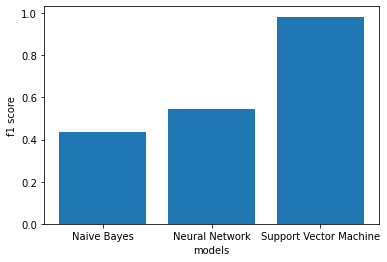

In [33]:
import matplotlib.pyplot as plt
score = [NB_f1_score, NN_f1_score, SVM_f1_score]
models = ["Naive Bayes", "Neural Network", "Support Vector Machine"]
plt.bar(models, score, label="model f1 score")
plt.xlabel("models")
plt.ylabel("f1 score")
plt.show()

# Application:

## Get the Top Stories from Google News

In [37]:
import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

news_url="https://news.google.com/news/rss"
Client=urlopen(news_url)
xml_page=Client.read()
Client.close()

soup_page=soup(xml_page,"xml")
news_list=soup_page.findAll("item")
# Print news title, url and publish date
title_list = []
url_list = []

for news in news_list:
    title_list.append(news.title.text)
    url_list.append(news.link.text)

#   print(news.pubDate.text)
#   print("-"*60)
# print(title_list)


## Use model to predict category of each news

In [38]:
import pickle
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category = ['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS', 'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES', 'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION', 'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS']

docs_new = title_list

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
SVM_predicted = loaded_model.predict(X_new_tfidf)

res= []
dic_2 = {'title': None, 'url': None, 'category': None}
for i in range(len(docs_new)):
#     print(category[SVM_predicted[i]])
    dic_2['title'] = title_list[i]
    dic_2['url'] = url_list[i]
    dic_2['category'] = category[SVM_predicted[i]]
    res.append(dic_2.copy())

output = json.dumps(res)
f2 = open('web/result.json', 'w')
f2.write(output)
f2.close()